In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
% matplotlib inline

In [2]:
df=pd.read_csv('Classified Data')

In [3]:
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [5]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df.drop(['TARGET CLASS'],axis=1))
scaled_features=scaler.transform(df.drop(['TARGET CLASS'],axis=1))
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [7]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train, y_test=train_test_split(df_feat,df['TARGET CLASS'],test_size=0.3,random_state=101)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)

In [10]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[145  14]
 [ 12 129]]
             precision    recall  f1-score   support

          0       0.92      0.91      0.92       159
          1       0.90      0.91      0.91       141

avg / total       0.91      0.91      0.91       300



In [11]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))


Text(0,0.5,'error rate')

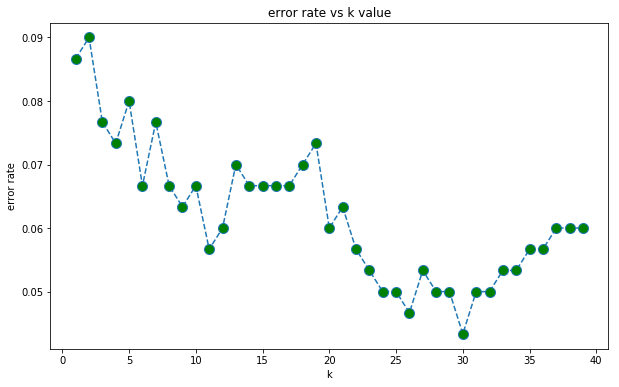

In [12]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,linestyle='dashed', marker='o',markerfacecolor='green',markersize=10)
plt.title('error rate vs k value')
plt.xlabel('k')
plt.ylabel('error rate')

In [13]:
knn=KNeighborsClassifier(n_neighbors=24)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[154   5]
 [ 10 131]]
             precision    recall  f1-score   support

          0       0.94      0.97      0.95       159
          1       0.96      0.93      0.95       141

avg / total       0.95      0.95      0.95       300

